In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("advertising.csv")

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


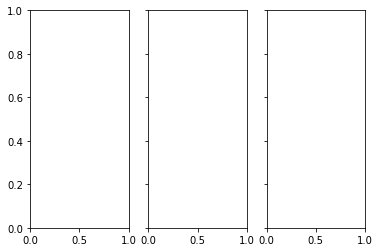

In [6]:
fig, axs = plt.subplots(1,3,sharey=True)

In [7]:
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(14,7))

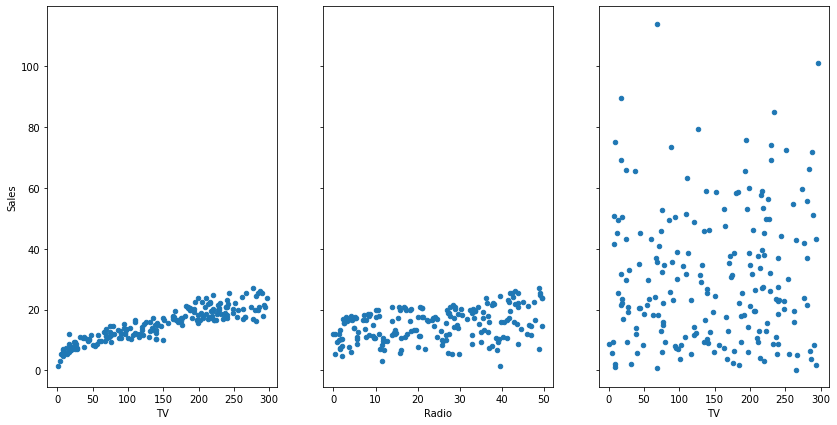

In [8]:
fig, axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(14,7))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='TV',y='Newspaper',ax=axs[2])

In [9]:
feature_cols=['TV']

In [10]:
X=data[feature_cols]
Y=data.Sales

In [11]:
#IMPORT LIBRARY

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [13]:
print(lr.intercept_)

6.9748214882298925


In [14]:
print(lr.coef_)

[0.05546477]


In [15]:
result=6.9748214882298925+0.05546477*50

In [16]:
result

9.748059988229892

In [17]:
X_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

In [18]:
X_new.head()

,TV
0,0.7
1,296.4


In [19]:
preds = lr.predict(X_new)

In [20]:
preds

array([ 7.01364683, 23.41457946])

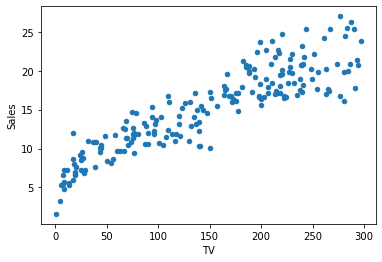

In [21]:
data.plot(kind='scatter',x='TV',y='Sales')

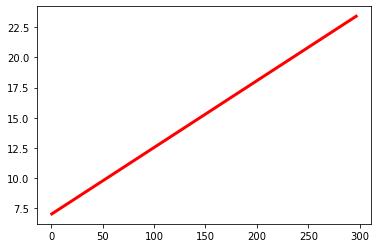

In [22]:
plt.plot(X_new,preds,c='red',linewidth=3)

In [24]:
import statsmodels.formula.api as smf

In [25]:
lm=smf.ols(formula='Sales~TV',data=data).fit()

In [26]:
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [27]:
#find probability values

In [28]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [29]:
#finding the R-squared values

In [30]:
lm.rsquared

0.8121757029987414

In [32]:
feature_cols=['TV','Radio','Newspaper']
X=data[feature_cols]
Y=data.Sales


In [34]:
lr=LinearRegression()

In [36]:
lr.fit(X,Y)

LinearRegression()

In [37]:
print(lr.intercept_)
print(lr.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [39]:
lm=smf.ols(formula='Sales~ TV+Radio+Newspaper',data=data).fit()

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           8.13e-99
Time:                        12:02:37   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm.conf_int()

,0,1
Intercept,4.018688,5.231560
TV,0.051734,0.057158
Radio,0.090259,0.123744
Newspaper,-0.011079,0.011751


In [45]:
lm=smf.ols(formula='Sales~ TV+Radio',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):          2.39e-100
Time:                        14:42:23   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lm.conf_int()

,0,1
Intercept,4.058369,5.203390
TV,0.051746,0.057152
Radio,0.091544,0.122805
